# README
- This file is used to show detail info about coordinates shift in different years.

In [1]:
import pandas as pd

In [2]:
GS_data_set = {}
CS_data_set = {}

for year in range(2013,2026):
    GS_data_set[year] = pd.read_parquet(f"C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate/GS_cleaned/GS_data_cleaned_{year}.parquet")
    print(year," GS ",len(GS_data_set[year]))
for year in range(2015,2026):
    CS_data_set[year] = pd.read_parquet(f"C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate/CS_cleaned/CS_data_cleaned_{year}.parquet")
    print(year," CS ",len(CS_data_set[year]))

2013  GS  98458
2014  GS  102642
2015  GS  117307
2016  GS  118338
2017  GS  118193
2018  GS  104177
2019  GS  109464
2020  GS  113399
2021  GS  116279
2022  GS  105157
2023  GS  112000
2024  GS  113219
2025  GS  114421
2015  CS  1829
2016  CS  1870
2017  CS  4220
2018  CS  33175
2019  CS  56250
2020  CS  72149
2021  CS  93798
2022  CS  96181
2023  CS  118293
2024  CS  182254
2025  CS  265110


In [3]:
import numpy as np

match_columns = ['pname','cityname','adname','address','name','大类','中类','小类']

GS_anchor_results = {}
GS_distance_stats = {}

for year in range(2013, 2025):
    if year + 1 not in GS_data_set or year not in GS_data_set:
        continue
    df1 = GS_data_set[year]
    df2 = GS_data_set[year + 1]
    # Address filter
    df1 = df1[df1['address'].str.strip().ne('') & df1['address'].str.strip().ne('[]')]
    df2 = df2[df2['address'].str.strip().ne('') & df2['address'].str.strip().ne('[]')]
    # Merge
    merged = pd.merge(df1, df2, on=match_columns, suffixes=('_prev', '_next'))
    GS_anchor_results[year] = merged
    # City stats
    city_counts = merged['cityname'].value_counts().to_dict()
    print(f"Year {year}: matched anchor stations per city:", city_counts)
    # Distance calculation
    merged['shift_x'] = (merged['wgs84_x_next'] - merged['wgs84_x_prev']) * 100000
    merged['shift_y'] = (merged['wgs84_y_next'] - merged['wgs84_y_prev']) * 100000
    GS_distance_stats[year] = {
        'shift_x': merged['shift_x'].describe().to_dict(),
        'shift_y': merged['shift_y'].describe().to_dict()
    }

CS_anchor_results = {}
CS_distance_stats = {}

for year in range(2015, 2025):
    if year + 1 not in CS_data_set or year not in CS_data_set:
        continue
    df1 = CS_data_set[year]
    df2 = CS_data_set[year + 1]
    # Address filter
    df1 = df1[df1['address'].str.strip().ne('') & df1['address'].str.strip().ne('[]')]
    df2 = df2[df2['address'].str.strip().ne('') & df2['address'].str.strip().ne('[]')]
    # Merge
    merged = pd.merge(df1, df2, on=match_columns, suffixes=('_prev', '_next'))
    CS_anchor_results[year] = merged
    # City stats
    city_counts = merged['cityname'].value_counts().to_dict()
    print(f"Year {year}: matched anchor stations per city:", city_counts)
    # Distance calculation
    merged['shift_x'] = (merged['wgs84_x_next'] - merged['wgs84_x_prev']) * 100000
    merged['shift_y'] = (merged['wgs84_y_next'] - merged['wgs84_y_prev']) * 100000
    CS_distance_stats[year] = {
        'shift_x': merged['shift_x'].describe().to_dict(),
        'shift_y': merged['shift_y'].describe().to_dict()
    }

Year 2013: matched anchor stations per city: {'上海市': 217, '北京市': 114, '成都市': 61, '济南市': 30, '杭州市': 25, '广州市': 24, '宁波市': 23, '天津市': 23, '深圳市': 20, '济宁市': 18, '哈尔滨市': 16, '长春市': 14, '乌鲁木齐市': 14, '武汉市': 14, '包头市': 12, '南宁市': 12, '青岛市': 10, '南昌市': 10, '运城市': 10, '石家庄市': 9, '沈阳市': 9, '重庆市': 9, '南京市': 9, '东营市': 9, '和田地区': 8, '大连市': 8, '辽阳市': 8, '扬州市': 7, '铜陵市': 7, '衢州市': 7, '日照市': 7, '威海市': 6, '太原市': 6, '南通市': 6, '兰州市': 6, '芜湖市': 6, '绵阳市': 6, '烟台市': 6, '安庆市': 6, '洛阳市': 5, '莱芜市': 5, '中山市': 5, '临沂市': 5, '东莞市': 5, '长沙市': 5, '宿州市': 5, '合肥市': 5, '岳阳市': 5, '苏州市': 5, '海西蒙古族藏族自治州': 5, '珠海市': 4, '无锡市': 4, '吐鲁番市': 4, '西双版纳傣族自治州': 4, '吉林市': 4, '嘉兴市': 4, '厦门市': 4, '三亚市': 4, '恩施土家族苗族自治州': 4, '银川市': 4, '湘潭市': 3, '白银市': 3, '果洛藏族自治州': 3, '连云港市': 3, '鄂州市': 3, '邢台市': 3, '十堰市': 3, '海北藏族自治州': 3, '齐齐哈尔市': 3, '唐山市': 3, '海口市': 3, '盐城市': 3, '惠州市': 3, '呼和浩特市': 3, '昆明市': 3, '巴音郭楞蒙古自治州': 3, '玉溪市': 3, '宣城市': 3, '菏泽市': 3, '淄博市': 3, '德阳市': 3, '绍兴市': 2, '保定市': 2, '郴州市': 2, '新乡市': 2, '绥化市': 2, '湖州市': 2, '衡水市': 2, '德州市': 2

In [39]:
tmp_year = 2013
df = GS_anchor_results[tmp_year]
result = (
    df.groupby(['pname', 'cityname'])
    .agg(
        shift_x_median=('shift_x', 'median'),
        shift_y_median=('shift_y', 'median'),
        anchor_count=('cityname', 'count')
    )
    .reset_index()
    .sort_values(['pname', 'cityname'])
)
print(f"Year: {tmp_year}")
result

Year: 2013


,pname,cityname,shift_x_median,shift_y_median,anchor_count
0,上海市,上海市,447.833051,-197.917828,217
1,云南省,临沧市,124.098809,-281.839088,1
2,云南省,保山市,89.743634,-288.798260,1
3,云南省,文山壮族苗族自治州,218.969778,-260.395459,1
4,云南省,昆明市,143.749062,-297.293874,3
...,...,...,...,...,...
156,青海省,海西蒙古族藏族自治州,93.327669,-47.845659,5
157,青海省,玉树藏族自治州,114.061634,-219.814237,2
158,黑龙江省,哈尔滨市,606.183112,200.786714,16
159,黑龙江省,绥化市,661.356993,193.241563,2


In [29]:
tmp_year = 2024
df = CS_anchor_results[tmp_year]
result = (
    df.groupby(['pname', 'cityname'])
    .agg(
        shift_x_median=('shift_x', 'median'),
        shift_y_median=('shift_y', 'median'),
        anchor_count=('cityname', 'count')
    )
    .reset_index()
    .sort_values(['pname', 'cityname'])
)
print(f"Year: {tmp_year}")
result

Year: 2024


,pname,cityname,shift_x_median,shift_y_median,anchor_count
0,上海市,上海市,-0.348157,-0.351137,2652
1,云南省,临沧市,0.028852,0.091817,107
2,云南省,丽江市,-0.055290,-0.085731,135
3,云南省,保山市,-0.058392,-0.107870,108
4,云南省,大理白族自治州,-0.023498,0.091241,228
...,...,...,...,...,...
361,黑龙江省,绥化市,-0.524652,-0.341111,11
362,黑龙江省,鸡西市,2.464303,1.517827,6
363,黑龙江省,鹤岗市,0.141859,0.226559,3
364,黑龙江省,黑河市,-2.980822,-2.073470,15


In [44]:
# This cell is used to groupby and combine the results for GS and CS
tmp_year = 2016

df_gs = GS_anchor_results[tmp_year]
df_cs = CS_anchor_results[tmp_year]
result_gs = (
    df_gs.groupby(['pname', 'cityname'])
    .agg(
        shift_x_median=('shift_x', 'median'),
        shift_y_median=('shift_y', 'median'),
        anchor_count=('cityname', 'count')
    )
    .reset_index()
    .sort_values(['pname', 'cityname'])
)
result_cs = (
    df_cs.groupby(['pname', 'cityname'])
    .agg(
        shift_x_median=('shift_x', 'median'),
        shift_y_median=('shift_y', 'median'),
        anchor_count=('cityname', 'count')
    )
    .reset_index()
    .sort_values(['pname', 'cityname'])
)

combined_result = pd.merge(
    result_gs,
    result_cs,
    on=['pname', 'cityname'],
    suffixes=('_gs', '_cs')
)
combined_result['shift_x_median_diff'] = combined_result['shift_x_median_gs'] - combined_result['shift_x_median_cs']
combined_result['shift_y_median_diff'] = combined_result['shift_y_median_gs'] - combined_result['shift_y_median_cs']
combined_result

,pname,cityname,shift_x_median_gs,shift_y_median_gs,anchor_count_gs,shift_x_median_cs,shift_y_median_cs,anchor_count_cs,shift_x_median_diff,shift_y_median_diff
0,上海市,上海市,-447.870750,200.400816,273,-450.323147,195.074449,22,2.452397,5.326367
1,云南省,昆明市,-145.749769,300.199971,135,-148.965734,294.694017,3,3.215966,5.505954
2,云南省,西双版纳傣族自治州,-116.104895,279.504500,52,-107.192233,294.514887,1,-8.912662,-15.010387
3,内蒙古自治区,兴安盟,-616.222845,-195.990386,27,-644.141953,-191.447625,1,27.919108,-4.542761
4,内蒙古自治区,包头市,-585.808770,-122.187580,78,-565.842565,-111.535855,1,-19.966205,-10.651725
...,...,...,...,...,...,...,...,...,...,...
117,黑龙江省,七台河市,-743.011678,-203.451469,15,-780.850995,-229.254444,1,37.839318,25.802975
118,黑龙江省,佳木斯市,-774.182433,-229.038926,81,-793.553005,-232.218538,1,19.370572,3.179612
119,黑龙江省,哈尔滨市,-636.533118,-207.554530,258,-592.346576,-193.216429,2,-44.186542,-14.338101
120,黑龙江省,大庆市,-656.143216,-193.906181,66,-700.304217,-205.908795,1,44.161001,12.002613


In [47]:
tmp_year = 2016

df_gs = GS_anchor_results[tmp_year]
df_cs = CS_anchor_results[tmp_year]

df_combined = pd.concat([df_gs, df_cs], ignore_index=True)

combined_shift_result = (
    df_combined.groupby(['pname','cityname'])
    .agg(
        shift_x_median=('shift_x', 'median'),
        shift_y_median=('shift_y', 'median'),
        anchor_count=('cityname', 'count'),
        average_x = ('wgs84_x_prev', 'mean'),
        average_y = ('wgs84_y_prev', 'mean')
    )
    .reset_index()
    .sort_values(['pname', 'cityname'])
)
combined_shift_result

,pname,cityname,shift_x_median,shift_y_median,anchor_count,average_x,average_y
0,上海市,上海市,-448.260144,200.033376,295,121.428226,31.192887
1,云南省,临沧市,-105.314397,282.587040,28,99.717306,24.169964
2,云南省,丽江市,-114.256219,356.073158,24,100.576508,26.711205
3,云南省,保山市,-80.466158,294.788929,50,98.997520,25.025270
4,云南省,大理白族自治州,-111.040106,308.204249,58,100.207439,25.797024
...,...,...,...,...,...,...,...
352,黑龙江省,绥化市,-650.735949,-201.374262,103,126.445562,46.629752
353,黑龙江省,鸡西市,-746.643583,-221.010219,53,131.668527,45.451184
354,黑龙江省,鹤岗市,-781.613123,-238.723696,18,130.859990,47.370796
355,黑龙江省,黑河市,-721.488202,-207.375049,50,126.686297,49.298661


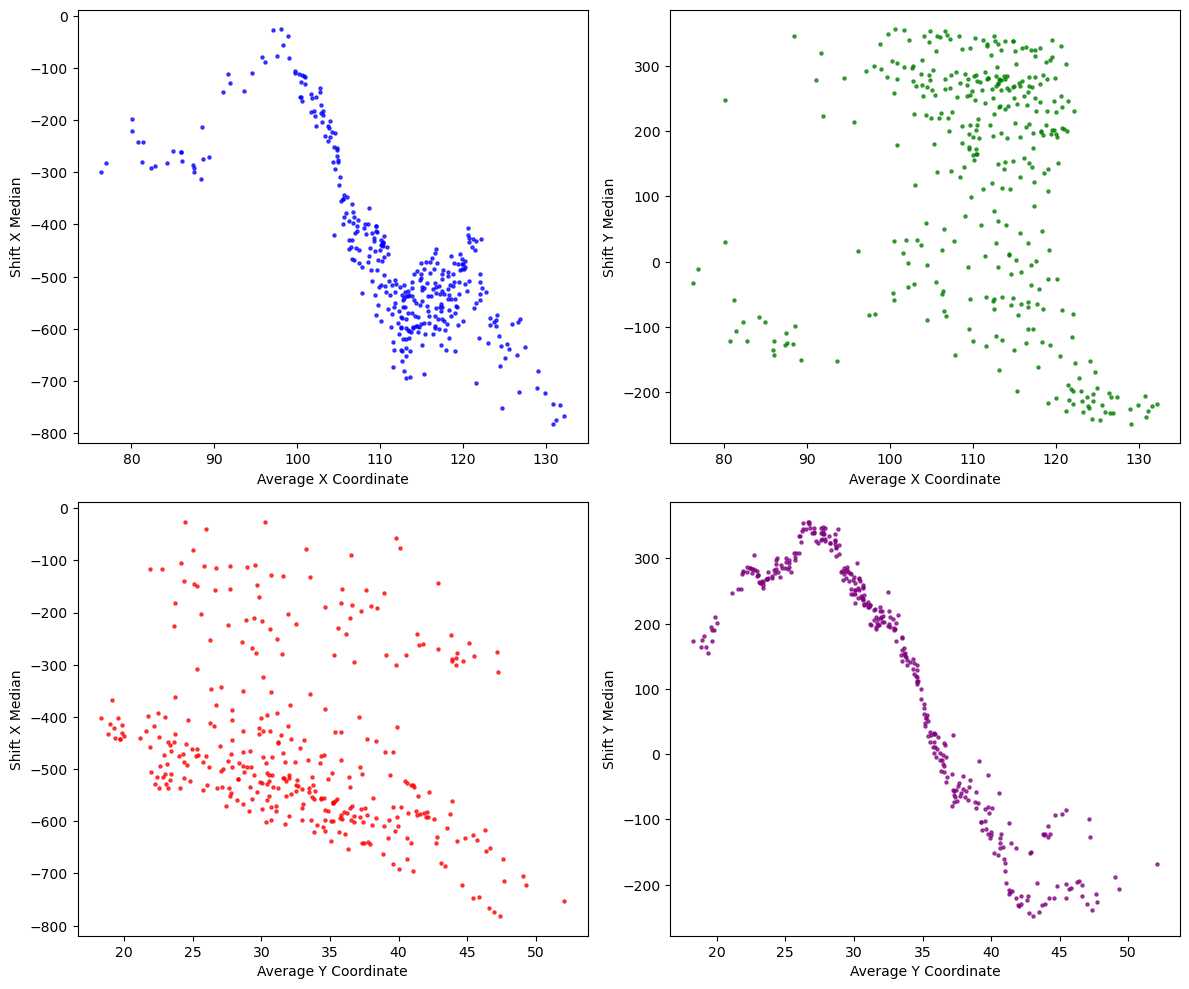

: 

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12, 10))

axes[0,0].scatter(
    combined_shift_result['average_x'],
    combined_shift_result['shift_x_median'],
    s=5,
    c='blue',
    alpha=0.7
)
axes[0,0].set_xlabel('Average X Coordinate')
axes[0,0].set_ylabel('Shift X Median')

axes[0,1].scatter(
    combined_shift_result['average_x'],
    combined_shift_result['shift_y_median'],
    s=5,
    c='green',
    alpha=0.7
)
axes[0,1].set_xlabel('Average X Coordinate')
axes[0,1].set_ylabel('Shift Y Median')

axes[1,0].scatter(
    combined_shift_result['average_y'],
    combined_shift_result['shift_x_median'],
    s=5,
    c='red',
    alpha=0.7
)
axes[1,0].set_xlabel('Average Y Coordinate')
axes[1,0].set_ylabel('Shift X Median')

axes[1,1].scatter(
    combined_shift_result['average_y'],
    combined_shift_result['shift_y_median'],
    s=5,
    c='purple',
    alpha=0.7
)
axes[1,1].set_xlabel('Average Y Coordinate')
axes[1,1].set_ylabel('Shift Y Median')

plt.tight_layout()
plt.show()
